# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing
!pip install kaggle

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 484.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 217.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 304.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 725.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p ~/.kaggle
!touch ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
import os

kaggle_username = "manasvi8"
kaggle_key = "b115b987e862aad206a3bd81fa8ffe69"

kaggle_json_path= os.path.expanduser("~/.kaggle/kaggle.json")
print(kaggle_json_path)

# Save API token the kaggle.json file
with open(kaggle_json_path, "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

/root/.kaggle/kaggle.json


### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [8]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 486MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [9]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [10]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [11]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [12]:
# Same thing as train and test dataset
sample_submission = pd.read_csv("sampleSubmission.csv")
sample_submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


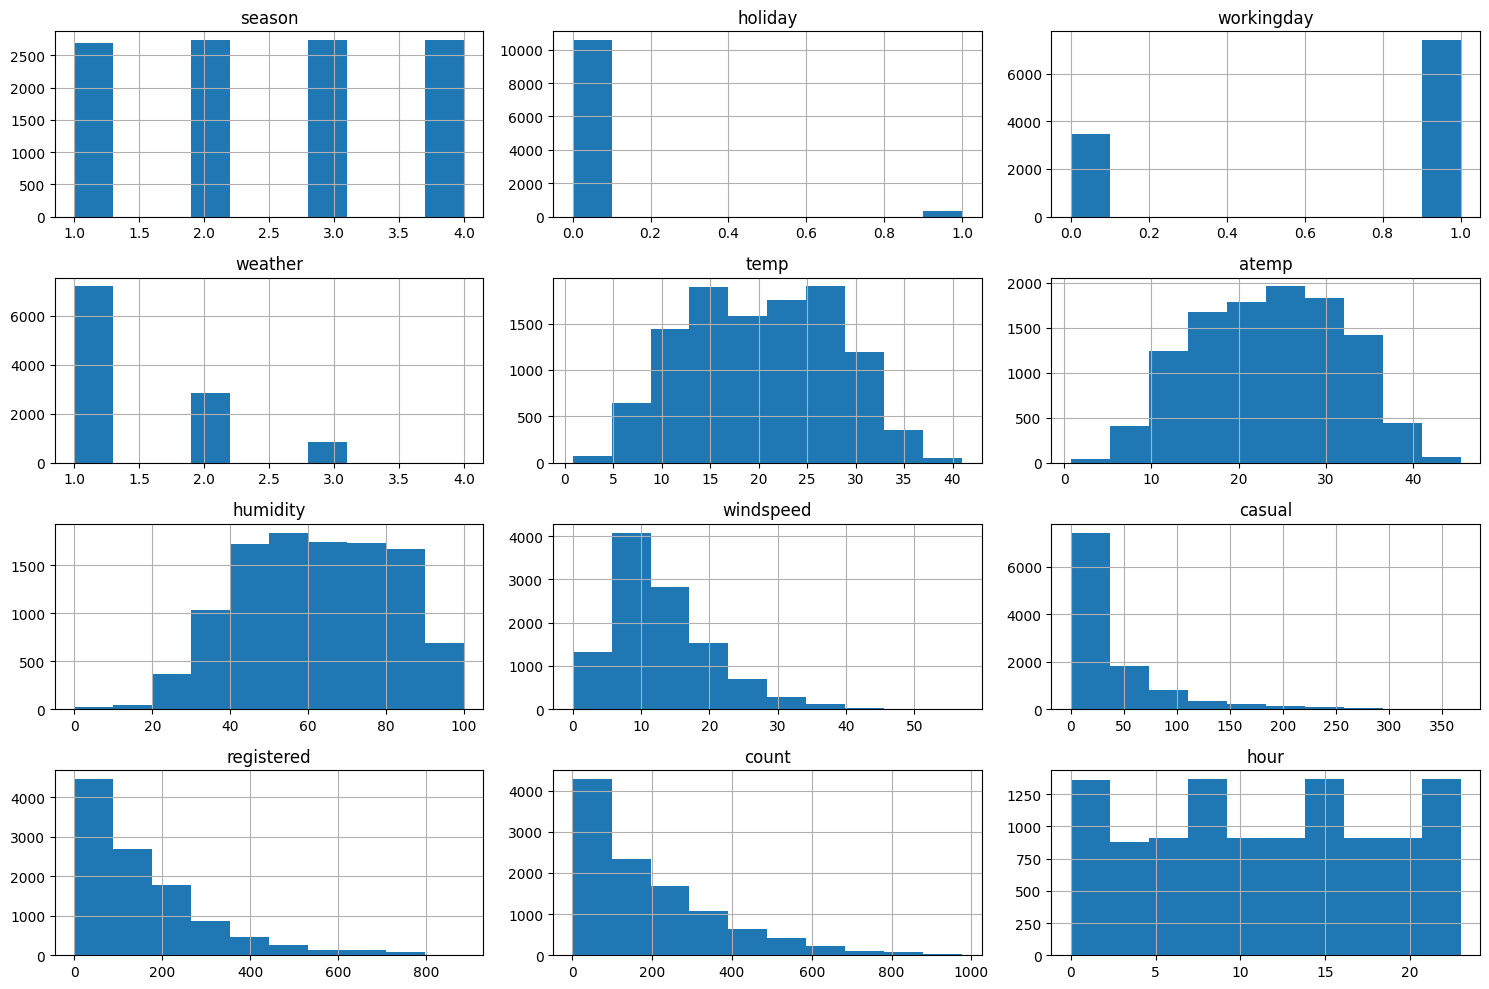

In [13]:
import matplotlib.pyplot as plt

# Extract hour from datetime
train["hour"] = pd.to_datetime(train["datetime"]).dt.hour
test["hour"] = pd.to_datetime(test["datetime"]).dt.hour

# Categorize rush hour
def rush_hour(hour):
    if hour in [7,8,9,17,18]:
        return 'rush'
    elif hour in [11,12,13]:
        return 'midday'
    else:
        return 'off'

train["rush_period"] = train["hour"].apply(rush_hour)
test["rush_period"] = test["hour"].apply(rush_hour)

# Histograms for all features
train.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Convert appropriate columns to 'category'
categorical = ['season', 'holiday', 'workingday', 'weather', 'hour', 'rush_period']
for col in categorical:
    train[col] = train[col].astype("category")
    test[col] = test[col].astype("category")

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [14]:
train_data = train.drop(columns=["datetime", "casual", "registered"])
label = "count"

predictor = TabularPredictor(label=label, eval_metric='rmse').fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20250606_154202"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.16 GB / 12.67 GB (88.1%)
Disk Space Avail:   71.90 GB / 112.64 GB (63.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competition

[1000]	valid_set's rmse: 69.3271


	-69.1354	 = Validation score   (-root_mean_squared_error)
	5.08s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM ...
	-69.7027	 = Validation score   (-root_mean_squared_error)
	0.9s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-71.1386	 = Validation score   (-root_mean_squared_error)
	8.0s	 = Training   runtime
	0.25s	 = Validation runtime
Fitting model: CatBoost ...
	-68.984	 = Validation score   (-root_mean_squared_error)
	52.3s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-71.3888	 = Validation score   (-root_mean_squared_error)
	4.43s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-68.2373	 = Validation score   (-root_mean_squared_error)
	16.01s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: XGBoost ...
	-73.9513	 = Validation score   (-root_mean_squared_error)
	1.68s	 = Training   runtime
	0.02s	 = Validation runti

### Review AutoGluon's training run with ranking of models that did the best.

In [15]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -66.497613  root_mean_squared_error       0.389247  78.292041                0.000439           0.014230            2       True         12
1       NeuralNetFastAI  -68.237293  root_mean_squared_error       0.044915  16.006506                0.044915          16.006506            1       True          8
2         LightGBMLarge  -68.812074  root_mean_squared_error       0.069923   1.970291                0.069923           1.970291            1       True         11
3              CatBoost  -68.984031  root_mean_squared_error       0.020639  52.303499                0.020639          52.303499            1       True          6
4            LightGBMXT  -69.135355  root_mean_squared_error       0.089367   5.075944                0.089367   

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': np.float64(-170.19629626547714),
  'KNeighborsDist': np.float64(-183.87281760812206),
  'LightGBMXT': np.float64(-69.13535500080701),
  'LightGBM': np.float64(-69.70266932264903),
  'RandomForestMSE': np.float64(-71.13863432094684),
  'CatBoost': np.float64(-68.98403124470326),
  'ExtraTreesMSE': np.float64(-71.38875751831696),
  'NeuralNetFastAI': np.float64(-68.23729347692864),
  'XGBoost': np.float64(-73.95127155871782),
  'NeuralNetTorch': np.float64(-74.29497748748418),
  'LightGBMLarge': np.float64(-68.8120744819715

### Create predictions from test dataset

In [16]:
test_data = test.drop(columns=["datetime"])
predictions = predictor.predict(test_data)
predictions.head()

,count
0,25.784605
1,7.780932
2,4.363595
3,4.391168
4,4.346107


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [17]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

,count
count,6493.000000
mean,187.786545
std,166.138138
min,-7.537990
25%,46.248959
50%,148.826675
75%,274.849060
max,809.515320


In [18]:
# How many negative values do we have?
len(predictions[predictions < 0])

42

In [19]:
# Set them to zero
predictions[predictions < 0] = 0

# or we can clipt them: predictions = predictions.clip(lower=0)

### Set predictions to submission dataframe, save, and submit

In [20]:
submission = pd.DataFrame({
    "datetime": test["datetime"],
    "count": predictions
})
submission.to_csv("submission.csv", index=False)

In [21]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:02<00:00, 89.9kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [22]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName           date                        description                                 status                     publicScore  privateScore  
-----------------  --------------------------  ------------------------------------------  -------------------------  -----------  ------------  
submission.csv     2025-06-06 15:45:58.870000  first raw submission                        SubmissionStatus.COMPLETE  0.50392      0.50392       
submission_v2.csv  2025-06-06 14:26:22.093000  Tuned hyperparameters with multiple models  SubmissionStatus.COMPLETE  0.47374      0.47374       
submission_v2.csv  2025-06-06 14:08:15.597000  Tuned hyperparameters with multiple models  SubmissionStatus.COMPLETE  0.47965      0.47965       
submission.csv     2025-06-06 14:01:32.130000  Clipped negative predictions to zero        SubmissionStatus.COMPLETE  0.50392      0.50392       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

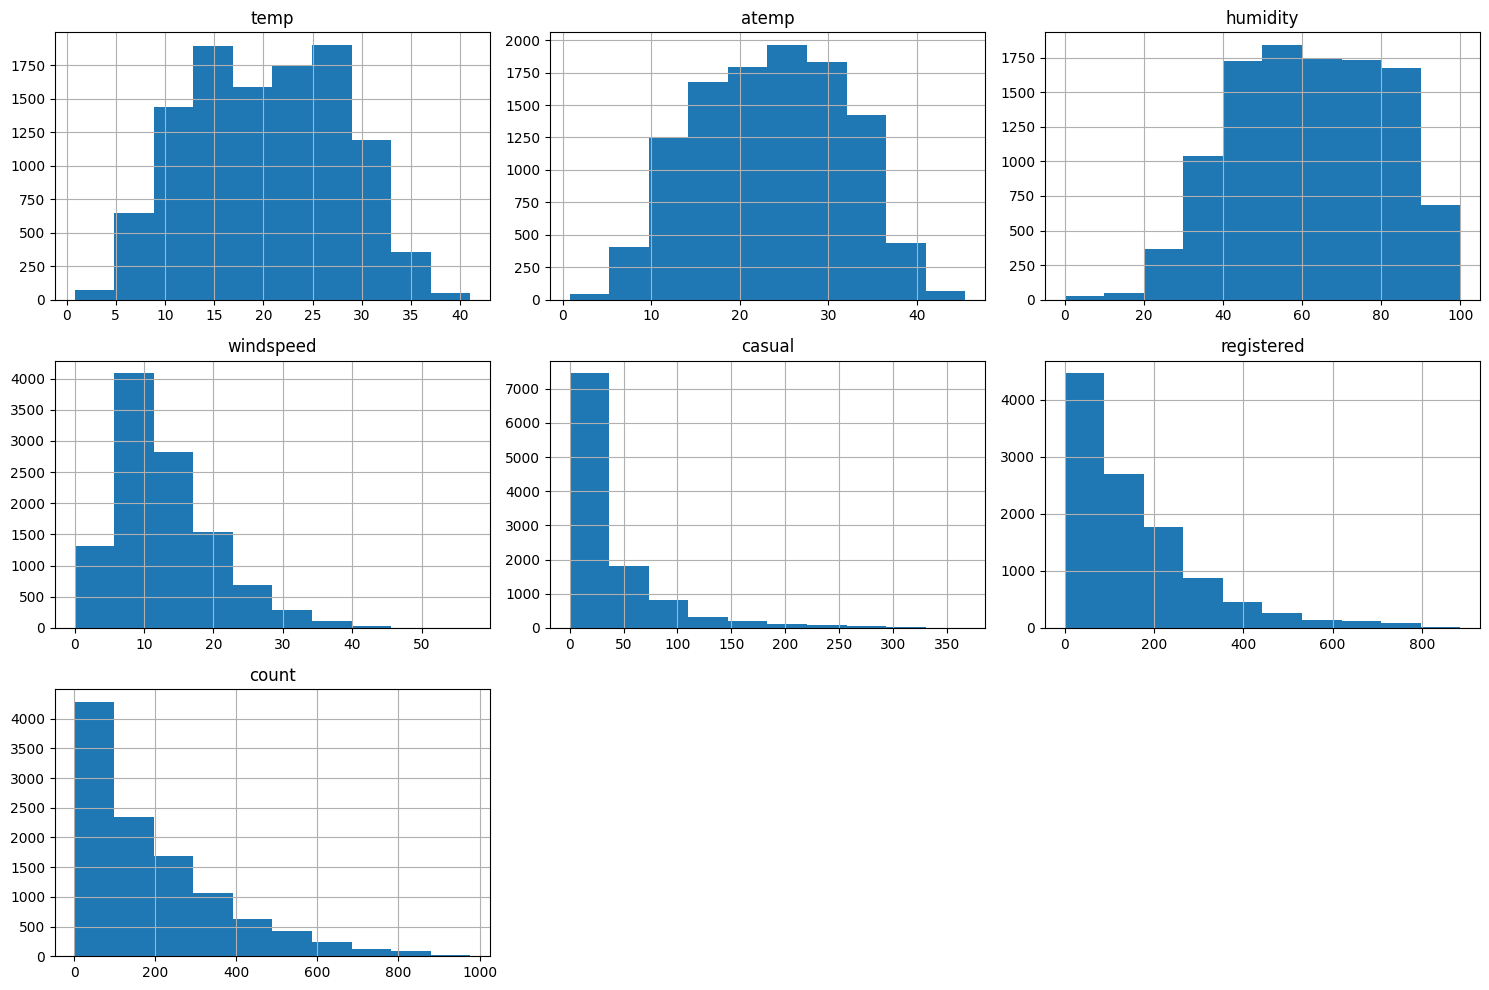

In [23]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [24]:
# create a new feature
train["year"] = pd.to_datetime(train["datetime"]).dt.year
test["year"] = pd.to_datetime(test["datetime"]).dt.year

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [25]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [26]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,rush_period,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,off,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,off,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,off,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,off,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,off,2011


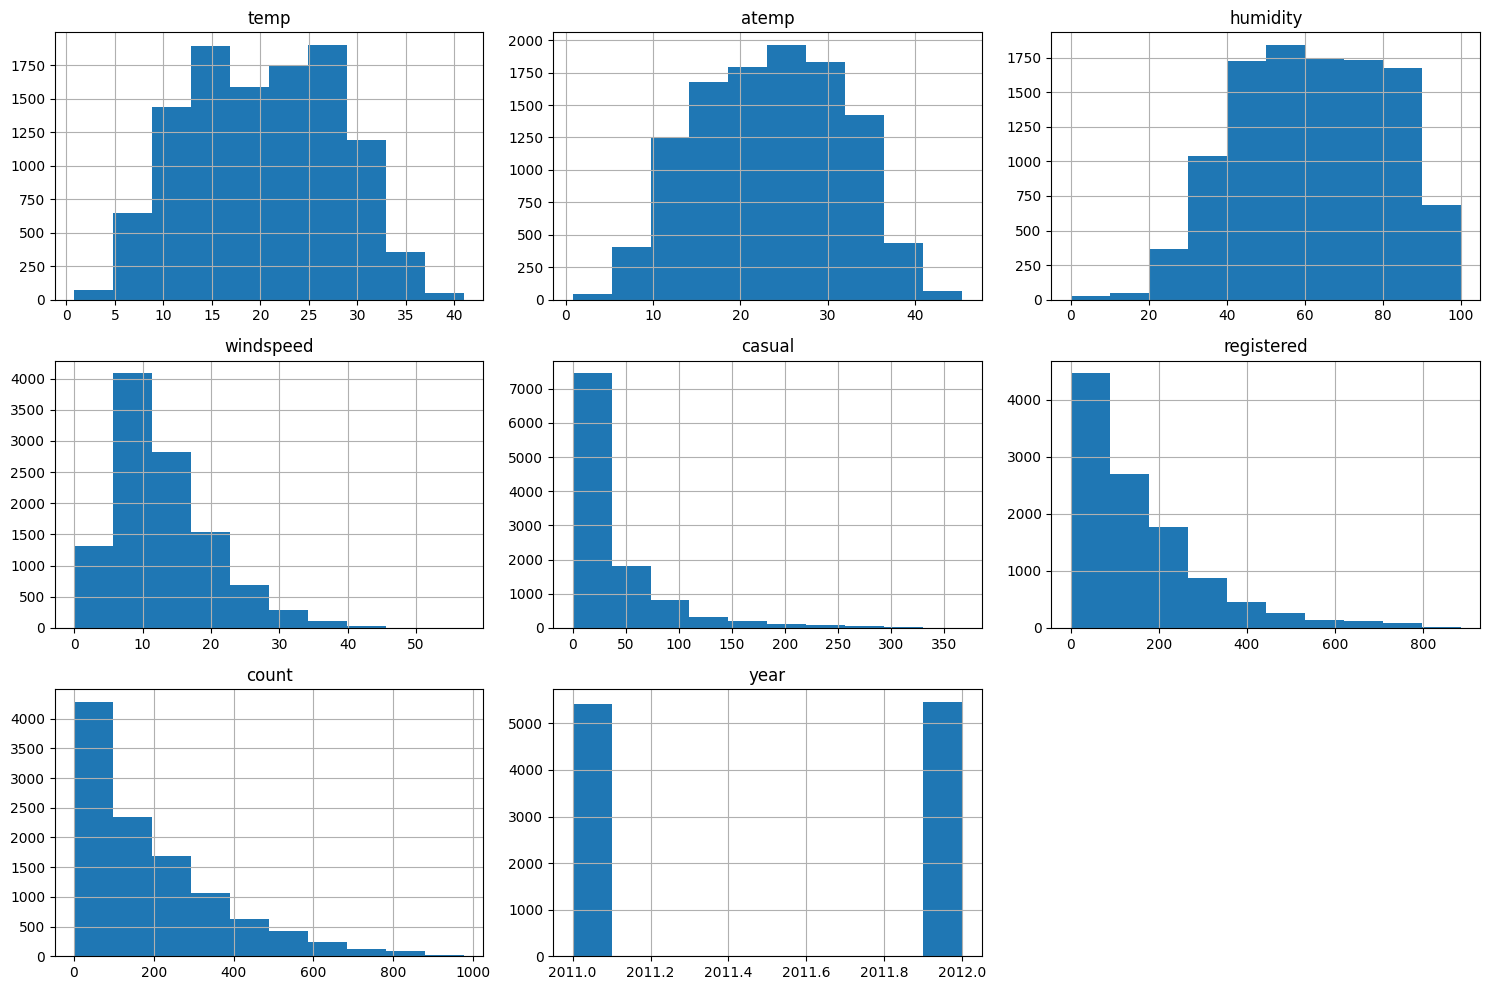

In [27]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [28]:
train_data_new_features = train.drop(columns=["datetime", "casual", "registered"])
predictor_new_features = TabularPredictor(label=label, eval_metric='rmse').fit(train_data_new_features)

No path specified. Models will be saved in: "AutogluonModels/ag-20250606_154858"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.53 GB / 12.67 GB (83.1%)
Disk Space Avail:   71.36 GB / 112.64 GB (63.4%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competition

In [29]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -40.824425  root_mean_squared_error       0.303253  91.112762                0.000354           0.017602            2       True         12
1       NeuralNetFastAI  -42.330885  root_mean_squared_error       0.024710  11.467981                0.024710          11.467981            1       True          8
2            LightGBMXT  -43.005368  root_mean_squared_error       0.044896   1.169141                0.044896           1.169141            1       True          3
3         LightGBMLarge  -43.356158  root_mean_squared_error       0.101959   2.214552                0.101959           2.214552            1       True         11
4              CatBoost  -43.706805  root_mean_squared_error       0.028989  68.890487                0.028989   

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': np.float64(-170.19629626547714),
  'KNeighborsDist': np.float64(-183.87281760812206),
  'LightGBMXT': np.float64(-43.00536847631757),
  'LightGBM': np.float64(-44.06276101089031),
  'RandomForestMSE': np.float64(-44.34953233824033),
  'CatBoost': np.float64(-43.706804833445176),
  'ExtraTreesMSE': np.float64(-44.42087871460616),
  'NeuralNetFastAI': np.float64(-42.330885253527306),
  'XGBoost': np.float64(-48.09117635122712),
  'NeuralNetTorch': np.float64(-44.98867782671562),
  'LightGBMLarge': np.float64(-43.35615831681

In [31]:
# Create predictions from test dataset using the new features
test_data_new_features = test.drop(columns=["datetime"])
predictions_new_features = predictor_new_features.predict(test_data_new_features)

# Remember to set all negative values to zero
predictions_new_features[predictions_new_features < 0] = 0

In [32]:
# Same submitting predictions
submission_new_features = pd.DataFrame({
    "datetime": test["datetime"],
    "count": predictions_new_features
})
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [33]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:02<00:00, 90.8kB/s]
Successfully submitted to Bike Sharing Demand

In [34]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                                 status                     publicScore  privateScore  
---------------------------  --------------------------  ------------------------------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-06-06 15:53:20.343000  new features                                SubmissionStatus.COMPLETE  0.42443      0.42443       
submission.csv               2025-06-06 15:45:58.870000  first raw submission                        SubmissionStatus.COMPLETE  0.50392      0.50392       
submission_v2.csv            2025-06-06 14:26:22.093000  Tuned hyperparameters with multiple models  SubmissionStatus.COMPLETE  0.47374      0.47374       
submission_v2.csv            2025-06-06 14:08:15.597000  Tuned hyperparameters with multiple models  SubmissionStatus.COMPLETE  0.47965      0.47965       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [38]:
# Try custom hyperparameters and time limits with hyperparameter tuning
hyperparameters = {
    'GBM': {},
    'CAT': {},
    'XGB': {},
    'RF': {},
    'NN_TORCH': {}
}

hyperparameter_tune_kwargs = {
    'searcher': 'bayes',
    'scheduler': 'local',
    'num_trials': 20
}

predictor_tuned = TabularPredictor(label=label, eval_metric="rmse").fit(
    train_data,
    presets="best_quality",
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    time_limit=800,
    raise_on_no_models_fitted=False
)


No path specified. Models will be saved in: "AutogluonModels/ag-20250606_155718"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.68 GB / 12.67 GB (84.3%)
Disk Space Avail:   70.86 GB / 112.64 GB (62.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

(_ray_fit pid=7762) [1000]	valid_set's rmse: 67.4489


(_dystack pid=7457) 	Stopping HPO to satisfy time limit...
  0%|          | 0/20 [00:40<?, ?it/s]
(_dystack pid=7457) Fitted model: LightGBM_BAG_L1/T1 ...
(_dystack pid=7457) 	-68.5604	 = Validation score   (-root_mean_squared_error)
(_dystack pid=7457) 	40.47s	 = Training   runtime
(_dystack pid=7457) 	0.79s	 = Validation runtime
(_dystack pid=7457) Hyperparameter tuning model: RandomForest_BAG_L1 ... Tuning model for up to 23.45s of the 154.92s of remaining time.
(_dystack pid=7457) 	No hyperparameter search space specified for RandomForest_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=7457) /usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
(_dystack pid=7457)   warnings.warn(
(_dystack pid=7457) Fitted

(_dystack pid=7457) ╭──────────────────────────────────────────────────────────╮
(_dystack pid=7457) │ Configuration for experiment     NeuralNetTorch_BAG_L1   │
(_dystack pid=7457) ├──────────────────────────────────────────────────────────┤
(_dystack pid=7457) │ Search algorithm                 SearchGenerator         │
(_dystack pid=7457) │ Scheduler                        FIFOScheduler           │
(_dystack pid=7457) │ Number of trials                 20                      │
(_dystack pid=7457) ╰──────────────────────────────────────────────────────────╯
(_dystack pid=7457) 
(_dystack pid=7457) View detailed results here: /content/AutogluonModels/ag-20250606_155718/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_BAG_L1


(model_trial pid=8969) Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): ray::_ray_fit() (pid=9018, ip=172.28.0.12)
(model_trial pid=8969)   File "/usr/local/lib/python3.11/dist-packages/autogluon/core/models/ensemble/fold_fitting_strategy.py", line 413, in _ray_fit
(model_trial pid=8969)     fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold, time_limit=time_limit_fold, **resources, **kwargs_fold)
(model_trial pid=8969)   File "/usr/local/lib/python3.11/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 1051, in fit
(model_trial pid=8969)     out = self._fit(**kwargs)
(model_trial pid=8969)           ^^^^^^^^^^^^^^^^^^^
(model_trial pid=8969)   File "/usr/local/lib/python3.11/dist-packages/autogluon/tabular/models/tabular_nn/torch/tabular_nn_torch.py", line 242, in _fit
(model_trial pid=8969)     raise TimeLimitExceeded
(model_trial pid=8969) autogluon.core.utils.exceptions.TimeLimitExceeded
(_ray_fit pid=8851) /usr/local/lib/python

(_dystack pid=7457) 


(model_trial pid=9131) Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
(_dystack pid=7457) 	Ensemble Weights: {'LightGBM_BAG_L1/T1': 0.55, 'RandomForest_BAG_L1': 0.4, 'CatBoost_BAG_L1/T1': 0.05}
(_dystack pid=7457) 	-67.3846	 = Validation score   (-root_mean_squared_error)
(_dystack pid=7457) 	0.69s	 = Training   runtime
(_dystack pid=7457) 	0.0s	 = Validation runtime
(_dystack pid=7457) Fitting 5 L2 models, fit_strategy="sequential" ...
(_dystack pid=7457) Hyperparameter tuning model: LightGBM_BAG_L2 ... Tuning model for up to 8.41s of the 46.7s of remaining time.
  0%|          | 0/20 [00:00<?, ?it/s]	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
(_ray_fit pid=9618) 	Ran out of time, early stopping on iteration 356. Best iteration is:
(_ray_fit pid=9618) 	[70]	valid_set

(_dystack pid=7457) ╭──────────────────────────────────────────────────────────╮
(_dystack pid=7457) │ Configuration for experiment     NeuralNetTorch_BAG_L2   │
(_dystack pid=7457) ├──────────────────────────────────────────────────────────┤
(_dystack pid=7457) │ Search algorithm                 SearchGenerator         │
(_dystack pid=7457) │ Scheduler                        FIFOScheduler           │
(_dystack pid=7457) │ Number of trials                 20                      │
(_dystack pid=7457) ╰──────────────────────────────────────────────────────────╯
(_dystack pid=7457) 
(_dystack pid=7457) View detailed results here: /content/AutogluonModels/ag-20250606_155718/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_BAG_L2


(_dystack pid=7457) Reached timeout of 8.410942525863648 seconds. Stopping all trials.
(_dystack pid=7457) Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250606_155718/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_BAG_L2' in 0.0381s.


(_dystack pid=7457) 


(_dystack pid=7457) Failed to fetch metrics for 2 trial(s):
(_dystack pid=7457) - 29d0ec77: FileNotFoundError('Could not fetch metrics for 29d0ec77: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250606_155718/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_BAG_L2/29d0ec77')
(_dystack pid=7457) - de8e7fc6: FileNotFoundError('Could not fetch metrics for de8e7fc6: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250606_155718/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_BAG_L2/de8e7fc6')
(_dystack pid=7457) No model was trained during hyperparameter tuning NeuralNetTorch_BAG_L2... Skipping this model.
(_dystack pid=7457) Fitting model: WeightedEnsemble_L3 ... Training model for up to 195.43s of the -58.52s of remaining time.
(model_trial pid=10537) Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.


  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.08%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-68.1127	 = Validation score   (-root_mean_squared_error)
	34.09s	 = Training   runtime
	0.8s	 = Validation runtime
Hyperparameter tuning model: RandomForest_BAG_L1 ... Tuning model for up to 63.61s of the 495.97s of remaining time.
	No hyperparameter search space specified for RandomForest_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
Fitted model: RandomForest_BAG_L1 ...
	-68.7785	 = Validation score   (-root_mean_squared_error)
	13.0s	 = Traini

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=3.76%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	-70.9382	 = Validation score   (-root_mean_squared_error)
	62.16s	 = Training   runtime
	0.17s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L1 ... Tuning model for up to 63.61s of the 420.68s of remaining time.


  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	-71.7032	 = Validation score   (-root_mean_squared_error)
	33.15s	 = Training   runtime
	0.44s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L1 ... Tuning model for up to 63.61s of the 387.42s of remaining time.


+----------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_BAG_L1   |
+----------------------------------------------------------+
| Search algorithm                 SearchGenerator         |
| Scheduler                        FIFOScheduler           |
| Number of trials                 20                      |
+----------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250606_155718/models/NeuralNetTorch_BAG_L1


2025-06-06 16:05:15,516	INFO timeout.py:54 -- Reached timeout of 63.6051831563902 seconds. Stopping all trials.
2025-06-06 16:05:15,545	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250606_155718/models/NeuralNetTorch_BAG_L1' in 0.0213s.
2025-06-06 16:05:25,568	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 2 trial(s):
- 08008b39: FileNotFoundError('Could not fetch metrics for 08008b39: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250606_155718/models/NeuralNetTorch_BAG_L1/08008b39')
- cdca8fb9: FileNotFoundError('Could not fetch metrics for cdca8fb9: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250606_155718/models/NeuralNetTorch_BAG_L1/cdca8fb9')
No model was trained during hyperparameter tuning NeuralNetTorch_BAG_L1... Skipping this model.
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.09%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-67.3753	 = Validation score   (-root_mean_squared_error)
	33.68s	 = Training   runtime
	0.13s	 = Validation runtime
Hyperparameter tuning model: RandomForest_BAG_L2 ... Tuning model for up to 56.35s of the 279.3s of remaining time.
	No hyperparameter search space specified for RandomForest_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
Fitted model: RandomForest_BAG_L2 ...
	-67.2971	 = Validation score   (-root_mean_squared_error)
	28.58s	 = Train

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=3.82%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	-66.4934	 = Validation score   (-root_mean_squared_error)
	60.26s	 = Training   runtime
	0.17s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L2 ... Tuning model for up to 56.35s of the 190.33s of remaining time.


  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.13%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	-67.013	 = Validation score   (-root_mean_squared_error)
	30.3s	 = Training   runtime
	0.27s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L2 ... Tuning model for up to 56.35s of the 159.92s of remaining time.


+----------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_BAG_L2   |
+----------------------------------------------------------+
| Search algorithm                 SearchGenerator         |
| Scheduler                        FIFOScheduler           |
| Number of trials                 20                      |
+----------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250606_155718/models/NeuralNetTorch_BAG_L2


2025-06-06 16:08:55,423	INFO timeout.py:54 -- Reached timeout of 56.349978075027465 seconds. Stopping all trials.
2025-06-06 16:08:55,440	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250606_155718/models/NeuralNetTorch_BAG_L2' in 0.0126s.
2025-06-06 16:09:05,464	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 2 trial(s):
- 3eb23ab5: FileNotFoundError('Could not fetch metrics for 3eb23ab5: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250606_155718/models/NeuralNetTorch_BAG_L2/3eb23ab5')
- cc1b5df4: FileNotFoundError('Could not fetch metrics for cc1b5df4: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250606_155718/models/NeuralNetTorch_BAG_L2/cc1b5df4')
No model was trained during hyperparameter tuning NeuralNetTorch_BAG_L2... Skipping this model.
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.00s of th

In [39]:
predictor_tuned.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -66.101960  root_mean_squared_error       3.052826  261.575241                0.000853           0.039236            3       True         10
1   CatBoost_BAG_L2/T1 -66.493364  root_mean_squared_error       2.146369  202.655256                0.165264          60.259597            2       True          8
2  WeightedEnsemble_L2 -66.561276  root_mean_squared_error       1.544028  109.277503                0.000739           0.030142            2       True          5
3    XGBoost_BAG_L2/T1 -67.012989  root_mean_squared_error       2.249694  172.698785                0.268589          30.303126            2       True          9
4  RandomForest_BAG_L2 -67.297084  root_mean_squared_error       2.618120  170.973281                0.637015         

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2/T1': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': np.float64(-68.11272296862201),
  'RandomForest_BAG_L1': np.float64(-68.77852186916192),
  'CatBoost_BAG_L1/T1': np.float64(-70.93819473187556),
  'XGBoost_BAG_L1/T1': np.float64(-71.70321841237634),
  'WeightedEnsemble_L2': np.float64(-66.56127626808282),
  'LightGBM_BAG_L2/T1': np.float64(-67.37529956311207),
  'RandomForest_BAG_L2': np.float64(-67.29708369492832),
  'CatBoost_BAG_L2/T1': np.float64(-6

In [40]:
predictions_new_hpo = predictor_tuned.predict(test_data_new_features)
predictions_new_hpo[predictions_new_hpo < 0] = 0

In [41]:
# Same submitting predictions
submission_new_hpo = pd.DataFrame({
    "datetime": test["datetime"],
    "count": predictions_new_hpo
})
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [42]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:02<00:00, 91.7kB/s]
Successfully submitted to Bike Sharing Demand

In [43]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                                 status                     publicScore  privateScore  
---------------------------  --------------------------  ------------------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-06-06 16:10:31.970000  new features with hyperparameters           SubmissionStatus.COMPLETE  0.47446      0.47446       
submission_new_features.csv  2025-06-06 15:53:20.343000  new features                                SubmissionStatus.COMPLETE  0.42443      0.42443       
submission.csv               2025-06-06 15:45:58.870000  first raw submission                        SubmissionStatus.COMPLETE  0.50392      0.50392       
submission_v2.csv            2025-06-06 14:26:22.093000  Tuned hyperparameters with multiple models  SubmissionStatus.COMPLETE  0.47374      0.47374       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

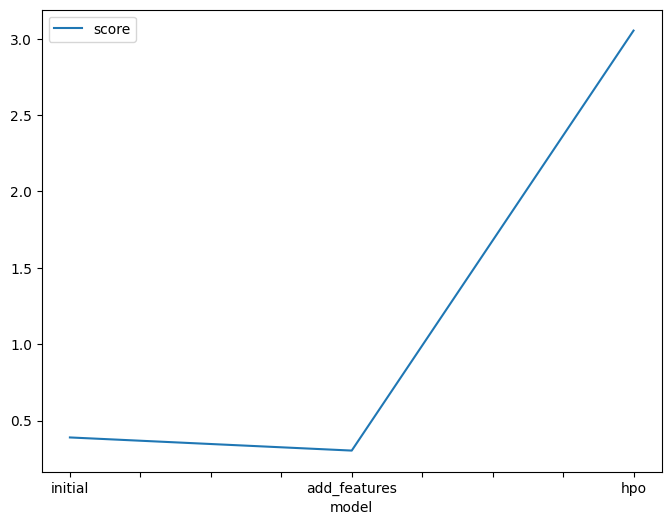

In [47]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [0.389247,0.303253, 3.052826 ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

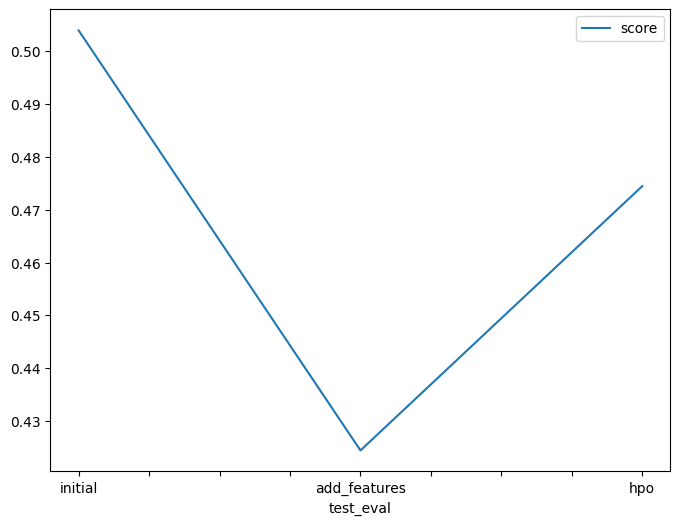

In [46]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [0.50392, 0.42443, 0.47446]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [48]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["N/A", "N/A", "Models Tuned: GBM, CAT"],
    "hpo2": ["N/A", "N/A", "Models Tuned: XGB, RF"],
    "hpo3": ["N/A", "N/A", "Models Tuned: NN_TORCH"],
    "score": [0.50392 , 0.42443 ,  0.47446]
})

,model,hpo1,hpo2,hpo3,score
0,initial,N/A,N/A,N/A,0.50392
1,add_features,N/A,N/A,N/A,0.42443
2,hpo,"Models Tuned: GBM, CAT","Models Tuned: XGB, RF",Models Tuned: NN_TORCH,0.47446
